# Audio Processing

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

print('Librosa {}'.format(librosa.__version__))

Librosa 0.8.0


In [2]:
female_speech_file = "Audio Samples/Female_Speech.WAV"
male_speech_file = "Audio Samples/Male_Speech.WAV"
kindergarden_noise_file = "Audio Samples/Kindergarten_Noise.wav"
trainstation_noise_file = "Audio Samples/TrainStation_Noise.wav"

ipd.Audio(kindergarden_noise_file)

In [3]:
female_speech, sampling_rate = librosa.load(female_speech_file, sr=22050)
male_speech, _ = librosa.load(male_speech_file, sr=22050)
kindergarden_noise, _ = librosa.load(kindergarden_noise_file, sr=22050)
trainstation_noise, _ = librosa.load(trainstation_noise_file, sr=22050)

In [4]:
sample_duration = 1/sampling_rate
audio_length = sample_duration * len(kindergarden_noise)

print("Sample Duration: {}\nFile Length:{}".format(sample_duration, audio_length))

Sample Duration: 4.5351473922902495e-05
File Length:30.0


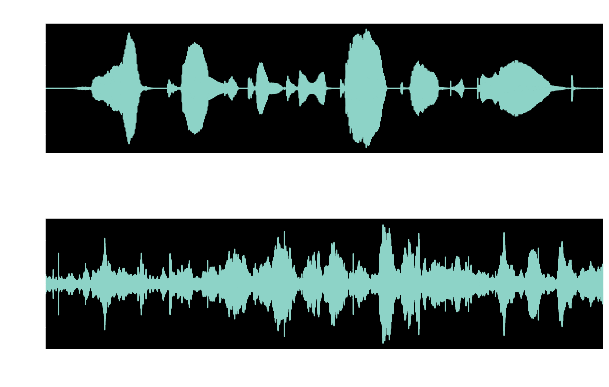

In [5]:
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
librosa.display.waveplot(female_speech)
plt.title("Female Voice")
# plt.ylim((-1, 1))

plt.subplot(2,1,2)
librosa.display.waveplot(kindergarden_noise)
plt.title("Kinder Garden")
# plt.ylim((-1, 1))

plt.show()

## Amplitude Envelope

In [6]:
def amplitude_envelope(signal, frame_length, hop_length):
    amplitude_envelope = []

    for i in range(0, len(signal), hop_length):
        amplitude_envelope.append(max(signal[i:i+frame_length]))

    return np.array(amplitude_envelope)

frame_length = 1024
hop_length = 512
frame_duration = frame_length * sample_duration

female_voice_amplitude_envelope = amplitude_envelope(female_speech, frame_length, hop_length)
# kindergarten_noise_amplitude_envelope = amplitude_envelope(kindergarden_noise, frame_size, hop_length)

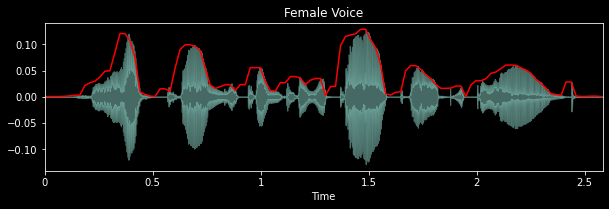

In [7]:
frames = range(0, female_voice_amplitude_envelope.size)
t = librosa.frames_to_time(frames=frames, sr=sampling_rate, hop_length=hop_length)

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
librosa.display.waveplot(female_speech, alpha=0.5)
plt.plot(t, female_voice_amplitude_envelope, color="r")
plt.title("Female Voice")
# plt.ylim((-1, 1))

plt.show()

## RMS Energy


In [8]:
# Librosa's Inbuilt Function
# female_speech_rms_energy = librosa.feature.rms(female_speech, frame_length, hop_length)[0]

def rms_energy(signal, frame_length, hop_length):
    rms = []

    for i in range(0, len(signal), hop_length):
        rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2) / frame_length)
        rms.append(rms_current_frame)

    return np.array(rms)

frame_length = 1024
hop_length = 512

female_speech_rms_energy = rms_energy(female_speech, frame_length, hop_length)


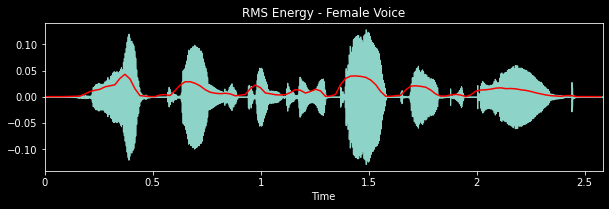

In [9]:
frames = range(0, len(female_speech_rms_energy))
t = librosa.frames_to_time(frames=frames, sr=sampling_rate, hop_length=hop_length)

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
librosa.display.waveplot(female_speech)
plt.plot(t, female_speech_rms_energy, color="r")
plt.title("RMS Energy - Female Voice")
# plt.ylim(-1, 1)

plt.show()


## Zero Crossing Rate


In [10]:
# Librosa's Inbuilt Function
female_speech_zero_crossing_rate = librosa.feature.zero_crossing_rate(female_speech, frame_length, hop_length)[0]
trainstation_noise_zero_crossing_rate = librosa.feature.zero_crossing_rate(trainstation_noise, frame_length, hop_length)[0]

frames_female_speech = range(0, len(female_speech_zero_crossing_rate))
frames_trainstation_noise = range(0, len(trainstation_noise_zero_crossing_rate))

t_female_speech = librosa.frames_to_time(frames=frames_female_speech, sr=sampling_rate, hop_length=hop_length)
t_trainstation = librosa.frames_to_time(frames=frames_trainstation_noise, sr=sampling_rate, hop_length=hop_length)

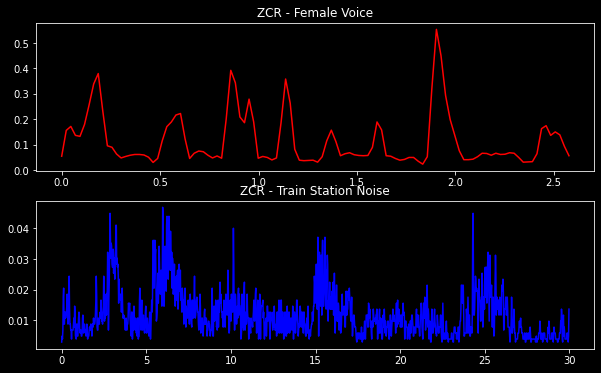

In [11]:
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(t_female_speech, female_speech_zero_crossing_rate, color="r")
plt.title("ZCR - Female Voice")
# plt.ylim(-1, 1)

plt.subplot(2,1,2)
plt.plot(t_trainstation, trainstation_noise_zero_crossing_rate, color="b")
plt.title("ZCR - Train Station Noise")
# plt.ylim(-1, 1)

plt.show()

## Spectrograms

### DFT


(57014,)
Complex Form: (0.7660156481308321-6.106226635438361e-16j)
Absolute: 0.7660156481308321


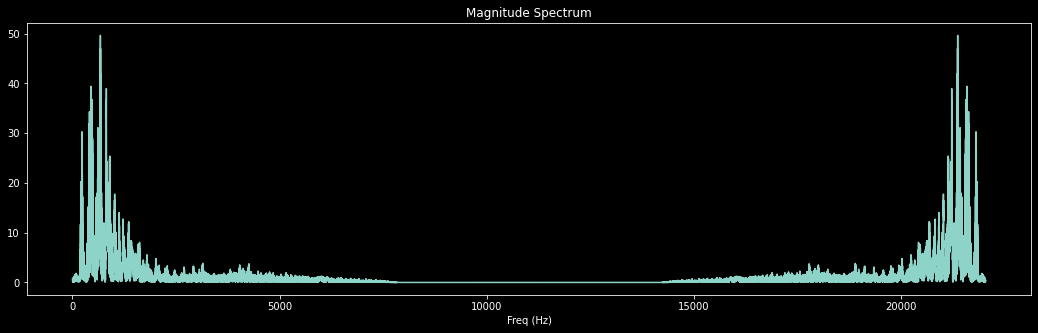

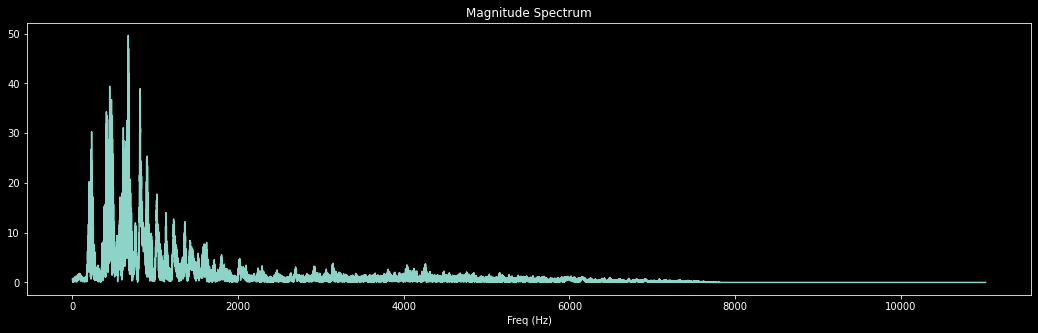

In [12]:
# Fourier Transform
female_speech_fft = np.fft.fft(female_speech)
print(female_speech_fft.shape)

print("Complex Form: {}".format(female_speech_fft[0]))

# Magnitude Spectrum
female_speech_magnitude_spectrum = np.abs(female_speech_fft)
print("Absolute: {}".format(female_speech_magnitude_spectrum[0]))

# Plot

plt.figure(figsize=(18,5))

frequency = np.linspace(0, sampling_rate, len(female_speech_magnitude_spectrum))
plt.plot(frequency, female_speech_magnitude_spectrum)
plt.xlabel("Freq (Hz)")
plt.title("Magnitude Spectrum")
plt.show()

plt.figure(figsize=(18,5))

# Considering Frequencies Upto Nyquist Frequencies
frequency_bins = int(len(female_speech_magnitude_spectrum) * 0.5)
frequency = np.linspace(0, sampling_rate, len(female_speech_magnitude_spectrum))
plt.plot(frequency[:frequency_bins], female_speech_magnitude_spectrum[:frequency_bins])
plt.xlabel("Freq (Hz)")
plt.title("Magnitude Spectrum")

plt.show()

### STFT

Linear Spectrogram

(513, 112)
<class 'numpy.complex64'>
(513, 112)
<class 'numpy.float32'>


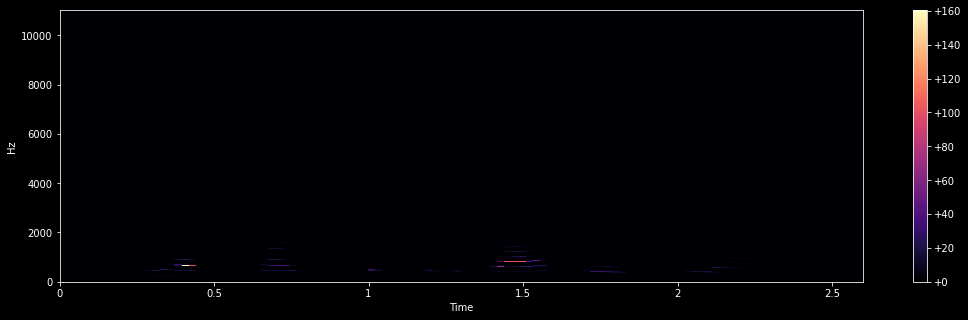

In [13]:
frame_length = 1024
hop_length = 512

female_speech_stft = librosa.stft(female_speech, n_fft=frame_length, hop_length=hop_length)
print(female_speech_stft.shape)
print(type(female_speech_stft[0][0]))

female_speech_magnitude_spectrum = np.abs(female_speech_stft) ** 2
print(female_speech_magnitude_spectrum.shape)
print(type(female_speech_magnitude_spectrum[0][0]))

plt.figure(figsize=(18, 5))
librosa.display.specshow(data=female_speech_magnitude_spectrum, sr=sampling_rate,
                         hop_length=hop_length, x_axis="time", y_axis="linear")
plt.colorbar(format="%+2.f")


Log-Amplitude Spectrogram


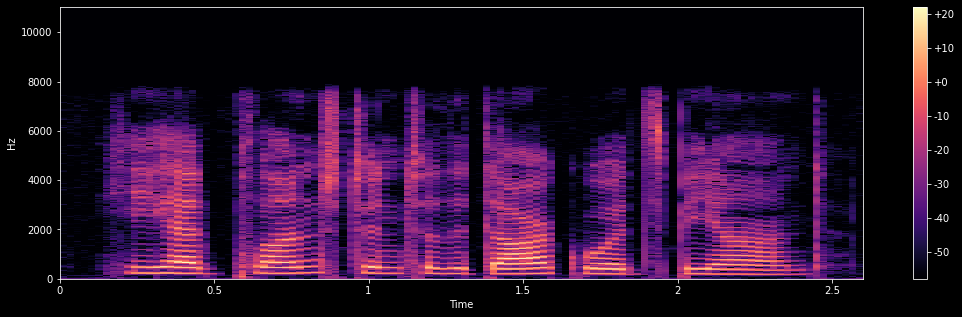

In [14]:
female_speech_magnitude_spectrum_db = librosa.power_to_db(female_speech_magnitude_spectrum)

plt.figure(figsize=(18, 5))
librosa.display.specshow(data=female_speech_magnitude_spectrum_db, sr=sampling_rate,
                         hop_length=hop_length, x_axis="time", y_axis="linear")
plt.colorbar(format="%+2.f")

Log-Frequency Spectrogram

/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


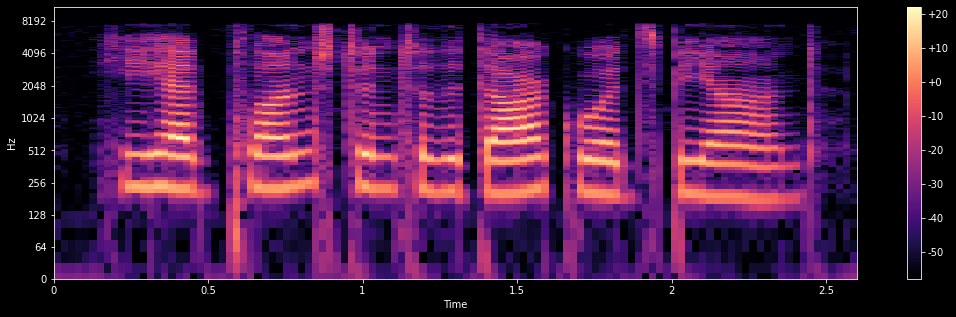

In [15]:
plt.figure(figsize=(18, 5))
librosa.display.specshow(data=female_speech_magnitude_spectrum_db, sr=sampling_rate,
                         hop_length=hop_length, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.f")

Fundamental Frequency

(112,)


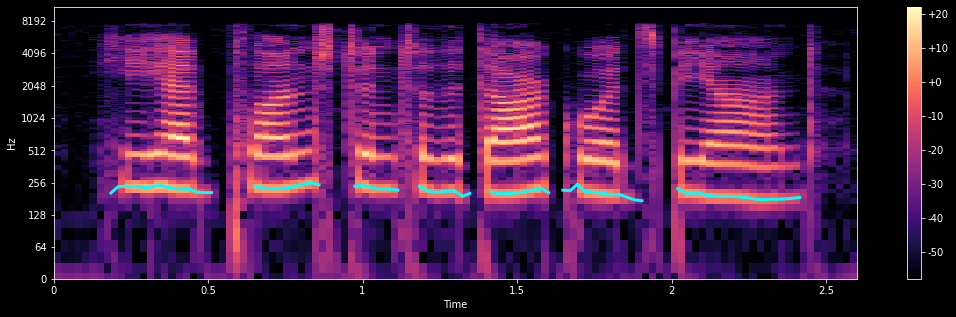

In [16]:
fundamental_frequencies, voiced_flags, voiced_prob = librosa.pyin(y=female_speech, sr=sampling_rate,
                                                                  frame_length=frame_length, hop_length=hop_length,
                                                                  fmin=100, fmax=500)
female_speech_frames = range(len(fundamental_frequencies))
time_axis = librosa.frames_to_time(female_speech_frames, hop_length=hop_length)

# time_axis = librosa.times_like(fundamental_frequencies, sr=sampling_rate,
#                                n_fft=frame_length, hop_length=hop_length)
print(time_axis.shape)
female_speech_stft = librosa.stft(y=female_speech,
                                  n_fft=frame_length, hop_length=hop_length)

female_speech_magnitude_spectrum = np.abs(female_speech_stft) ** 2
female_speech_magnitude_spectrum_db = librosa.power_to_db(female_speech_magnitude_spectrum)

plt.figure(figsize=(18, 5))
librosa.display.specshow(data=female_speech_magnitude_spectrum_db, sr=sampling_rate,
                         hop_length=hop_length, x_axis="time", y_axis="log")
plt.plot(time_axis, fundamental_frequencies, color='cyan', linewidth=3)
plt.colorbar(format="%+2.f")


Mel Spectrogram

(10, 513)


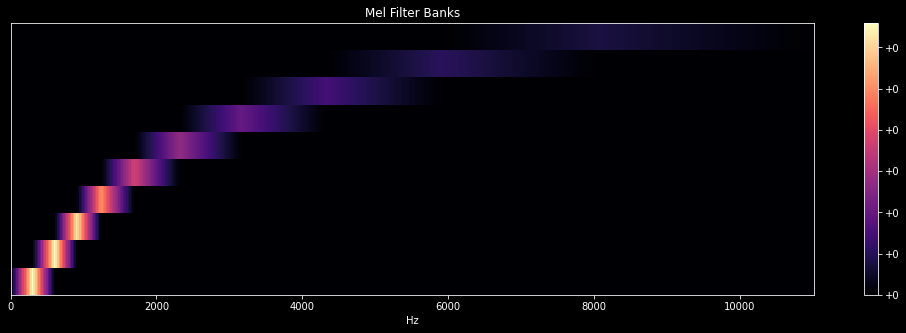

(13, 112)
(13, 112)


/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


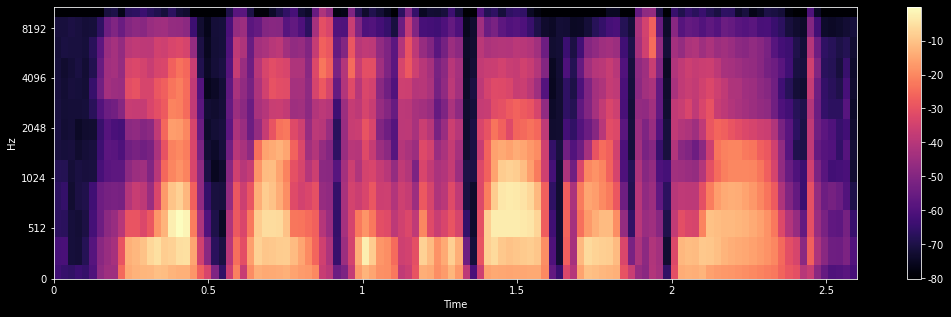

In [17]:

frame_length = 1024
hop_length = 512

mel_filter_banks = librosa.filters.mel(n_fft=frame_length, sr=sampling_rate, n_mels=10)
print(mel_filter_banks.shape)

plt.figure(figsize=(18,5))
librosa.display.specshow(data=mel_filter_banks, sr=sampling_rate, x_axis="linear")
plt.colorbar(format="%+2.f")
plt.title("Mel Filter Banks")

plt.show()

female_speech_mel_spectrogram = librosa.feature.melspectrogram(female_speech, sr=sampling_rate, n_fft=frame_length,
                                                               hop_length=hop_length, n_mels=13)
print(female_speech_mel_spectrogram.shape)

female_speech_log_mel_spectrogram = librosa.power_to_db(female_speech_mel_spectrogram)
print(female_speech_log_mel_spectrogram.shape)


plt.figure(figsize=(18, 5))

librosa.display.specshow(data=female_speech_log_mel_spectrogram, sr=sampling_rate,
                         x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.f")
plt.show()


### MFCC

(13, 112)


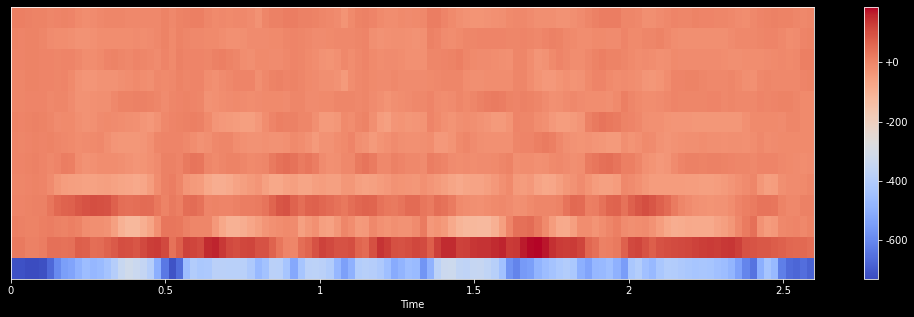

In [18]:
female_speech_mfcc = librosa.feature.mfcc(y=female_speech, sr=sampling_rate, n_mfcc=13)
print(female_speech_mfcc.shape)

plt.figure(figsize=(18,5))

librosa.display.specshow(data=female_speech_mfcc, sr=sampling_rate,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

### MFCCs from MelSpectrogram

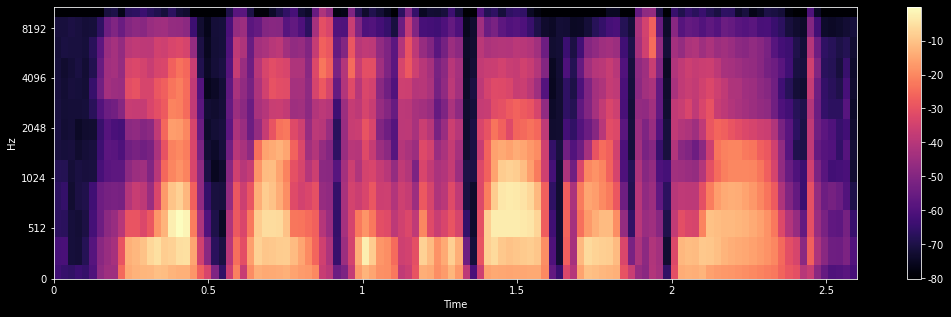

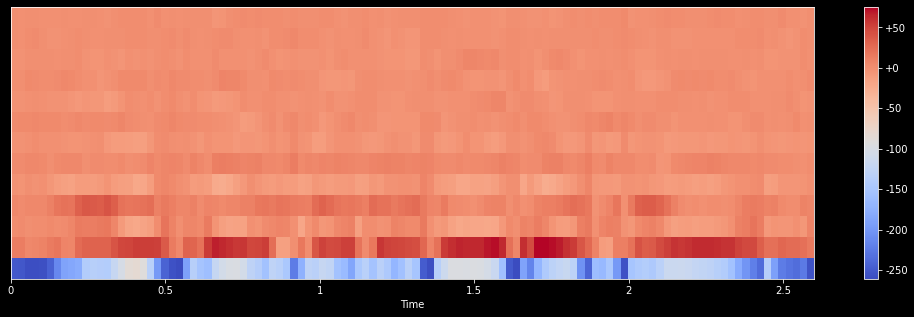

False


In [19]:
female_speech_stft = librosa.stft(female_speech, n_fft=frame_length, hop_length=hop_length)

female_speech_magnitude_spectrum = np.abs(female_speech_stft) ** 2

female_speech_mel_spectrogram = librosa.feature.melspectrogram(S=female_speech_magnitude_spectrum, sr=sampling_rate,
                                                               n_mels=13)

female_speech_log_mel_spectrogram = librosa.power_to_db(female_speech_mel_spectrogram)

plt.figure(figsize=(18, 5))

librosa.display.specshow(data=female_speech_log_mel_spectrogram, sr=sampling_rate,
                         x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.f")
plt.show()


female_speech_mfcc2 = librosa.feature.mfcc(S=female_speech_log_mel_spectrogram, sr=sampling_rate, n_mfcc=13)

plt.figure(figsize=(18,5))

librosa.display.specshow(data=female_speech_mfcc2, sr=sampling_rate,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

check_equal = female_speech_mfcc == female_speech_mfcc2
print(check_equal.all())

Delta && Delta Delta MFCC

Shape: (13, 112) & (13, 112)


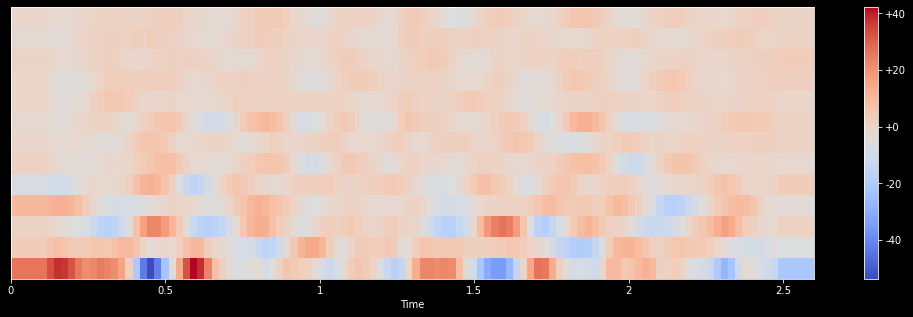

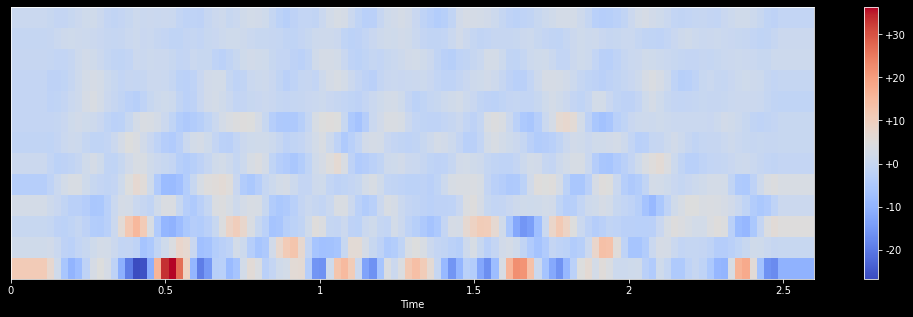

In [20]:
female_speech_delta_mfcc = librosa.feature.delta(female_speech_mfcc)
female_speech_delta2_mfcc = librosa.feature.delta(female_speech_mfcc, order=2)
print("Shape: {} & {}".format(female_speech_delta_mfcc.shape, female_speech_delta2_mfcc.shape))

plt.figure(figsize=(18,5))

librosa.display.specshow(data=female_speech_delta_mfcc, sr=sampling_rate,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

plt.figure(figsize=(18,5))

librosa.display.specshow(data=female_speech_delta2_mfcc, sr=sampling_rate,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

All MFCC Features

Shape: (39, 112)


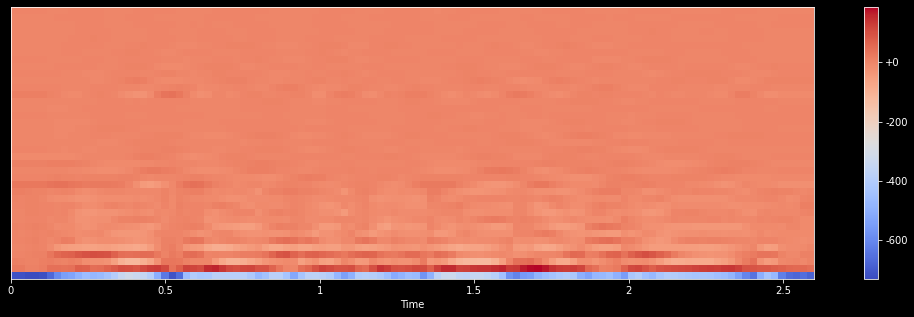

In [21]:
female_speech_all_mfcc = np.concatenate((female_speech_mfcc, female_speech_delta_mfcc, female_speech_delta2_mfcc))
print("Shape: {}".format(female_speech_all_mfcc.shape))

plt.figure(figsize=(18,5))

librosa.display.specshow(data=female_speech_all_mfcc, sr=sampling_rate,
                         x_axis="time")
plt.colorbar(format="%+2.f")
plt.show()

Band Energy Ratio

(513, 112)
93
(112, 513)
(112, 513)
112


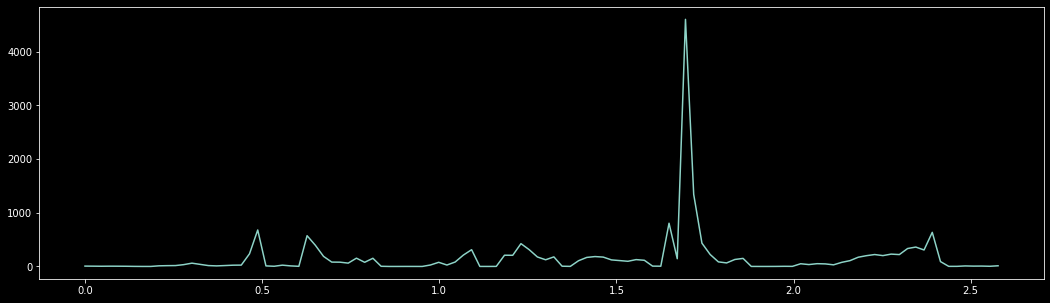

In [22]:
frame_length = 1024
hop_length = 512

# Spectrogram
female_speech_stft = librosa.stft(female_speech, n_fft=frame_length, hop_length=hop_length)
print(female_speech_stft.shape)
# Frequency Bins * Frames (Time)

# Split Freq Bins
split_frequency = 2000 # Hz
frequency_range = sampling_rate / 2
frequency_range_per_bin = frequency_range / female_speech_stft.shape[0]
split_frequency_bin = int(np.floor(split_frequency/frequency_range_per_bin))

print(split_frequency_bin)

# Power Spectrogram
female_speech_magnitude_spectrum = np.abs(female_speech_stft) ** 2

female_speech_stft_transpose = female_speech_stft.T
print(female_speech_stft_transpose.shape)

female_speech_magnitude_spectrum_transpose = female_speech_magnitude_spectrum.T
print(female_speech_magnitude_spectrum_transpose.shape)

band_energy_ratio = []
for frequency_in_frame in female_speech_magnitude_spectrum_transpose:
    low_freq_power_sum = np.sum(frequency_in_frame[:split_frequency_bin])
    high_freq_power_sum = np.sum(frequency_in_frame[split_frequency_bin:])
    band_energy_ratio_frame = low_freq_power_sum / high_freq_power_sum
    band_energy_ratio.append(band_energy_ratio_frame)

print(len(band_energy_ratio))
band_energy_ratio_np = np.array(band_energy_ratio)

plt.figure(figsize=(18,5))

female_speech_frames = range(len(band_energy_ratio))
time = librosa.frames_to_time(female_speech_frames, hop_length=hop_length)

plt.plot(time, band_energy_ratio_np)
plt.show()

Spectral Centroid

(1, 112)
(112,)


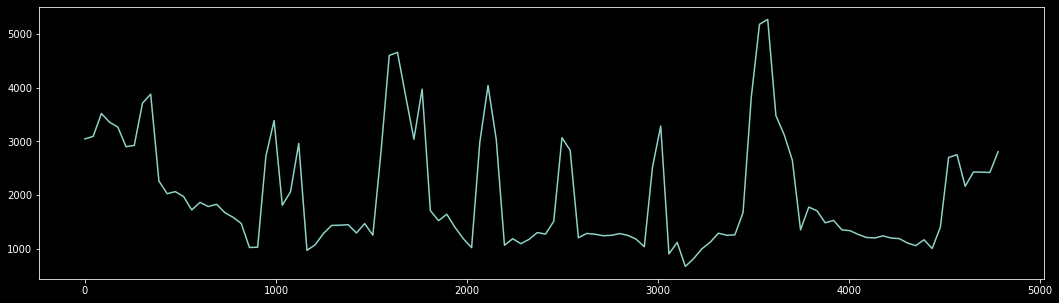

In [23]:
frame_length = 1024
hop_length = 512

female_speech_spectral_centroid = librosa.feature.spectral_centroid(y=female_speech, sr=sampling_rate,
                                                                    n_fft=frame_length, hop_length=hop_length)
print(female_speech_spectral_centroid.shape)

female_speech_spectral_centroid = female_speech_spectral_centroid[0]
print(female_speech_spectral_centroid.shape)

plt.figure(figsize=(18, 5))

female_speech_frames = range(len(female_speech_spectral_centroid))
time = librosa.time_to_frames(female_speech_frames, hop_length=hop_length, sr=sampling_rate)

plt.plot(time, female_speech_spectral_centroid)
plt.show()

Spectral Centroid From Spectrogram

(1, 112)
(112,)


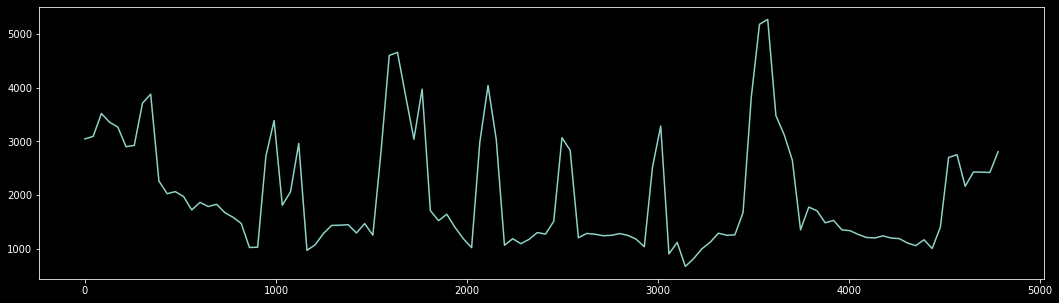

In [24]:
frame_length = 1024
hop_length = 512

female_speech_stft = librosa.stft(female_speech, n_fft=frame_length, hop_length=hop_length)
female_speech_magnitude_spectrum, _ = librosa.magphase(female_speech_stft)

female_speech_spectral_centroid = librosa.feature.spectral_centroid(S=female_speech_magnitude_spectrum, sr=sampling_rate,
                                                                    n_fft=frame_length, hop_length=hop_length)
print(female_speech_spectral_centroid.shape)

female_speech_spectral_centroid = female_speech_spectral_centroid[0]
print(female_speech_spectral_centroid.shape)

plt.figure(figsize=(18, 5))

female_speech_frames = range(len(female_speech_spectral_centroid))
time = librosa.time_to_frames(female_speech_frames, hop_length=hop_length, sr=sampling_rate)

plt.plot(time, female_speech_spectral_centroid)
plt.show()

Spectral Bandwidth


(1, 112)
(112,)


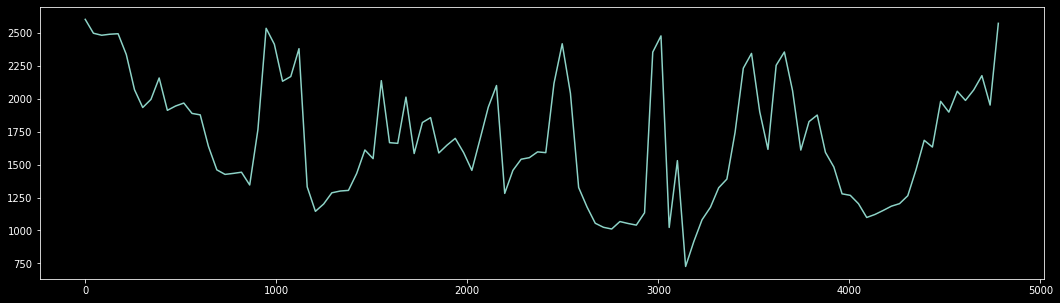

In [25]:
female_speech_spectral_bandwidth = librosa.feature.spectral_bandwidth(y=female_speech, sr=sampling_rate,
                                                                      hop_length=hop_length, n_fft=frame_length)
print(female_speech_spectral_bandwidth.shape)

female_speech_spectral_bandwidth = female_speech_spectral_bandwidth[0]
print(female_speech_spectral_bandwidth.shape)

plt.figure(figsize=(18,5))

female_speech_frames = range(len(female_speech_spectral_bandwidth))
time = librosa.time_to_frames(female_speech_frames, hop_length=hop_length, sr=sampling_rate)

plt.plot(time, female_speech_spectral_bandwidth)
plt.show()

Spectral Bandwidth from Spectrogram


(1, 112)
(112,)


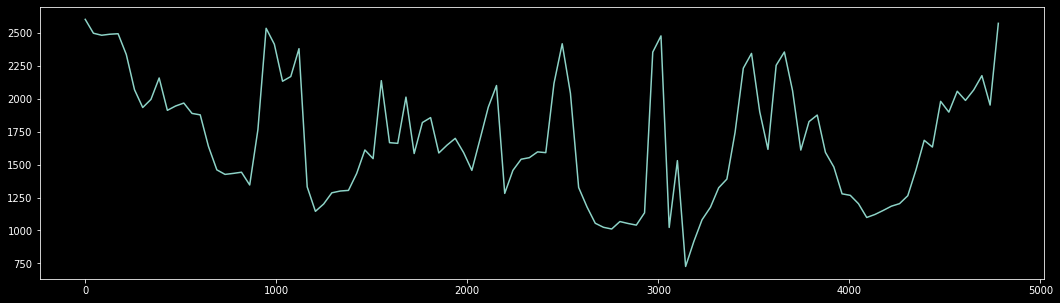

In [26]:
female_speech_stft = librosa.stft(female_speech, n_fft=frame_length, hop_length=hop_length)
female_speech_magnitude_spectrum, _ = librosa.magphase(female_speech_stft)

female_speech_spectral_bandwidth = librosa.feature.spectral_bandwidth(S=female_speech_magnitude_spectrum, sr=sampling_rate,
                                                                      hop_length=hop_length, n_fft=frame_length)
print(female_speech_spectral_bandwidth.shape)

female_speech_spectral_bandwidth = female_speech_spectral_bandwidth[0]
print(female_speech_spectral_bandwidth.shape)

plt.figure(figsize=(18,5))

female_speech_frames = range(len(female_speech_spectral_bandwidth))
time = librosa.time_to_frames(female_speech_frames, hop_length=hop_length, sr=sampling_rate)

plt.plot(time, female_speech_spectral_bandwidth)
plt.show()

### Vorbis Window
W(n) = sin[pi/2*sin(pi*n/N)]


(513, 112)


/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


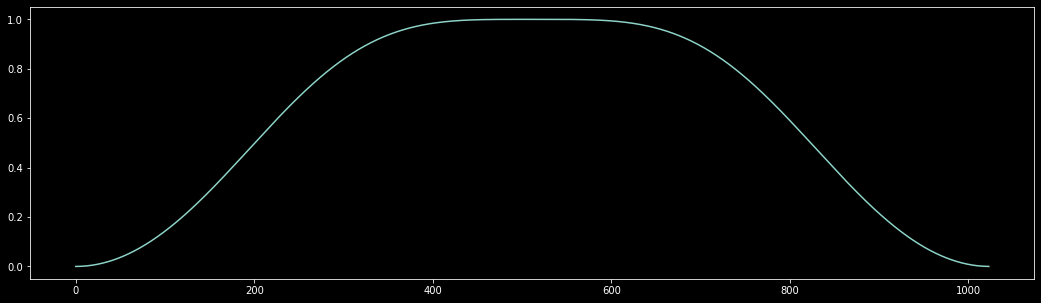

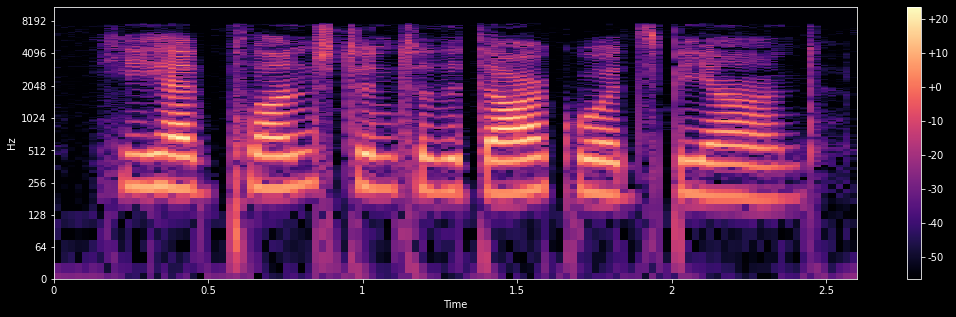

In [27]:
window_length = 1024

n = np.linspace(0, window_length-1, window_length)
# n = np.arange(1024)
pi = np.pi
vorbis_window = np.sin(pi/2 * (np.sin(pi*(n/window_length)))**2 )
plt.figure(figsize=(18,5))
plt.plot(vorbis_window)

female_speech_stft = librosa.stft(female_speech, n_fft=frame_length,
                                  hop_length=hop_length, window=vorbis_window,
                                  win_length=window_length)
print(female_speech_stft.shape)

female_speech_magnitude_spectrum = np.abs(female_speech_stft) ** 2
female_speech_magnitude_spectrum_db = librosa.power_to_db(female_speech_magnitude_spectrum)

plt.figure(figsize=(18, 5))
librosa.display.specshow(data=female_speech_magnitude_spectrum_db, sr=sampling_rate,
                         hop_length=hop_length, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.f")

### Hanning Window
W(n) = 0.5(1-cos(2*pi*n/N))


(513, 112)


/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


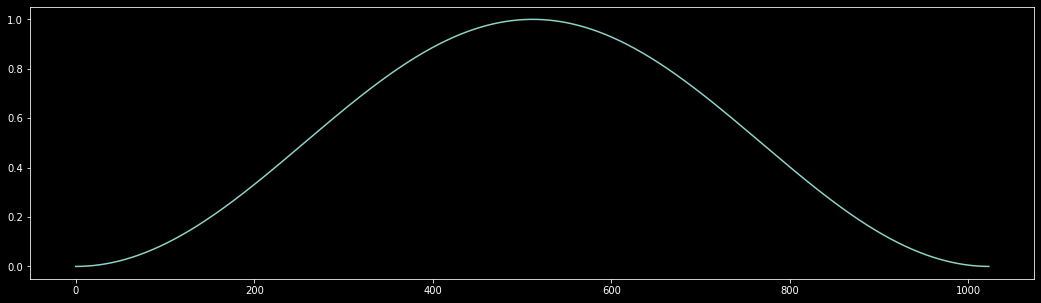

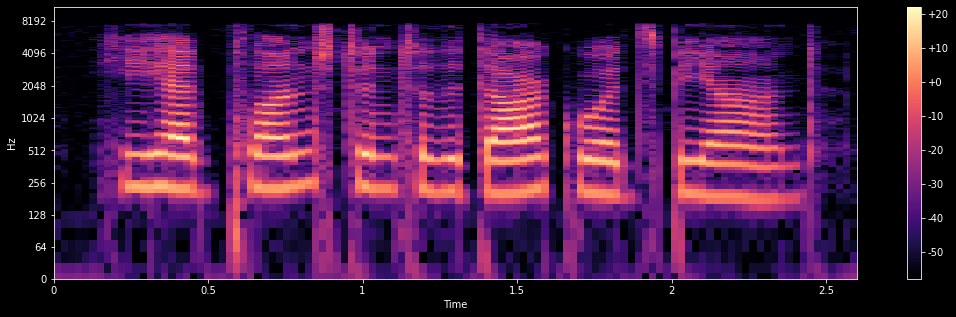

In [28]:
window_length = 1024
pi = np.pi

# hanning_window = np.hanning(window_length)
x_axis = np.linspace(0, window_length-1, window_length)
hanning_window = 0.5*(1-np.cos(2*pi*n/window_length))

plt.figure(figsize=(18, 5))
plt.plot(hanning_window)

female_speech_stft = librosa.stft(female_speech, n_fft=frame_length,
                                  hop_length=hop_length, window=hanning_window,
                                  win_length=window_length)
print(female_speech_stft.shape)

female_speech_magnitude_spectrum = np.abs(female_speech_stft) ** 2
female_speech_magnitude_spectrum_db = librosa.power_to_db(female_speech_magnitude_spectrum)

plt.figure(figsize=(18, 5))
librosa.display.specshow(data=female_speech_magnitude_spectrum_db, sr=sampling_rate,
                         hop_length=hop_length, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.f")

Track pitch

/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/abish/Documents/Project/Speech Enhancement Model/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


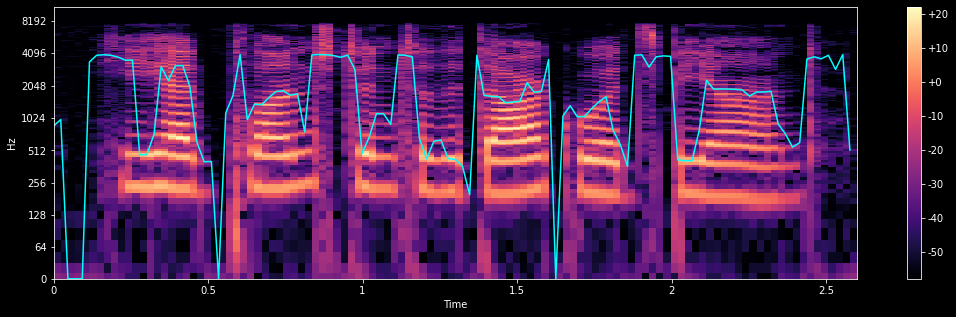

In [59]:
female_speech_pitch, female_speech_mag  = librosa.piptrack(S=female_speech_stft, sr=sampling_rate,
                                             n_fft=frame_length, hop_length=hop_length)

female_speech_pitch_max = np.amax(female_speech_pitch, axis=0)

plt.figure(figsize=(18, 5))
librosa.display.specshow(data=female_speech_magnitude_spectrum_db, sr=sampling_rate,
                         hop_length=hop_length, x_axis="time", y_axis="log")

audio_frames = range(len(female_speech_mag[1]))
time_axis = librosa.frames_to_time(audio_frames, sr=sampling_rate, hop_length=hop_length)

plt.plot(time_axis, female_speech_pitch_max, color='cyan')
plt.colorbar(format="%+2.f")